<a href="https://colab.research.google.com/github/Reanooka-Kumar/Syntecxhub_Maze_Solver_using_A-_Search/blob/main/WEEK_1_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJECT** **-** **1:**

**Maze Solver using** A* **Search**



**SETUP AND NODE CLASS:**


In [18]:
import heapq
class Node:
    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position
        self.g = 0
        self.h = 0
        self.f = 0
    def __lt__(self, other):
        return self.f < other.f
    def __eq__(self, other):
        return self.position == other.position
    def __hash__(self):
        return hash(self.position)

**HEURISTIC FUNCTION**

In [19]:
def manhattan_distance(node_position, goal_position):
    x1, y1 = node_position
    x2, y2 = goal_position
    return abs(x1 - x2) + abs(y1 - y2)

A*  **SEARCH ALGORITHM**

In [20]:
def a_star_search(maze, start, end):
    start_node = Node(None, start)
    end_node = Node(None, end)
    open_list = []
    heapq.heappush(open_list, start_node)
    closed_set = set()
    movements = [(0, -1), (0, 1), (-1, 0), (1, 0)]
    while open_list:
        current_node = heapq.heappop(open_list)
        closed_set.add(current_node)
        if current_node.position == end_node.position:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            return path[::-1]
        for move in movements:
            node_position = (current_node.position[0] + move[0],
                             current_node.position[1] + move[1])
            if not (0 <= node_position[0] < len(maze) and
                    0 <= node_position[1] < len(maze[0])):
                continue
            if maze[node_position[0]][node_position[1]] == 1:
                continue
            new_node = Node(current_node, node_position)
            if new_node in closed_set:
                continue
            new_node.g = current_node.g + 1 # Cost of one step
            new_node.h = manhattan_distance(new_node.position, end_node.position)
            new_node.f = new_node.g + new_node.h
            is_better_path = False
            for node in open_list:
                if new_node == node and new_node.g >= node.g:
                    is_better_path = True
                    break

            if not is_better_path:
                heapq.heappush(open_list, new_node)
    return None

**VISUALIZATION AND EXECUTION**

In [21]:
def visualize_maze(maze, path=None, start=None, end=None):
    print("\n" + "="*40)
    if path:
        print("✅ Shortest Path Found (Length: {})".format(len(path) - 1))
    else:
        print("❌ Goal is Unreachable")
    print("="*40)
    if not path:
        path = []

    output_maze = [row[:] for row in maze]
    WALL = '█'
    PATH = '•'
    START = 'S'
    GOAL = 'G'
    EMPTY = ' '

    for r, c in path:
        output_maze[r][c] = PATH
    if start:
        output_maze[start[0]][start[1]] = START
    if end:
        output_maze[end[0]][end[1]] = GOAL
    for row in output_maze:
        print(" ".join(str(cell).replace('0', EMPTY).replace('1', WALL) for cell in row))

    if path:
        print("\nPath Coordinates (R, C):")
        print(" -> ".join(f"({r},{c})" for r, c in path))

# EXAMPLE MAZES
MAZE_1 = [
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 1, 0, 1, 1, 1, 0],
    [0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 1, 0, 1, 1, 1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 1, 1, 1, 1, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
]

MAZE_2_UNREACHABLE = [
    [0, 1, 0],
    [0, 1, 0],
    [0, 0, 0]
]

if __name__ == '__main__':
    start_pos_1 = (0, 0)
    end_pos_1 = (6, 9)
    print("--- Running A* on Maze 1 (Reachable) ---")
    shortest_path_1 = a_star_search(MAZE_1, start_pos_1, end_pos_1)
    visualize_maze(MAZE_1, shortest_path_1, start_pos_1, end_pos_1)
    print("\n" + "#"*50 + "\n")
    start_pos_2 = (0, 0)
    end_pos_2 = (0, 2)

    print("--- Running A* on Maze 2 (Unreachable) ---")
    shortest_path_2 = a_star_search(MAZE_2_UNREACHABLE, start_pos_2, end_pos_2)
    visualize_maze(MAZE_2_UNREACHABLE, shortest_path_2, start_pos_2, end_pos_2)

--- Running A* on Maze 1 (Reachable) ---

✅ Shortest Path Found (Length: 15)
S       █          
• █ █   █   █ █ █  
• █         █      
• █   █ █ █ █   █  
• • • • • • •   █  
  █ █ █ █ █ • █ █  
          █ • • • G

Path Coordinates (R, C):
(0,0) -> (1,0) -> (2,0) -> (3,0) -> (4,0) -> (4,1) -> (4,2) -> (4,3) -> (4,4) -> (4,5) -> (4,6) -> (5,6) -> (6,6) -> (6,7) -> (6,8) -> (6,9)

##################################################

--- Running A* on Maze 2 (Unreachable) ---

✅ Shortest Path Found (Length: 6)
S █ G
• █ •
• • •

Path Coordinates (R, C):
(0,0) -> (1,0) -> (2,0) -> (2,1) -> (2,2) -> (1,2) -> (0,2)


**GRAPHICAL VISUALIZATION**

In [17]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
cmap = mcolors.ListedColormap(['white', 'black', 'green', 'red', 'blue'])
bounds = [0, 1, 2, 3, 4, 5]
norm = mcolors.BoundaryNorm(bounds, cmap.N)


In [16]:
def visualize_maze_graphical(maze, path=None, start=None, end=None):
    if 'cmap' not in globals() or 'norm' not in globals():
        print("ERROR: Please run Block 5 (Matplotlib Setup) first to define cmap and norm.")
        return

    if path is None:
        print("❌ Goal is Unreachable. Displaying un-solved maze.")
        path = []
    else:
        print(f"✅ Shortest Path Found (Length: {len(path) - 1}). Displaying solution.")
    plot_matrix = [row[:] for row in maze]
    for r, c in path:
        plot_matrix[r][c] = 4
    if start:
        plot_matrix[start[0]][start[1]] = 2
    if end:
        plot_matrix[end[0]][end[1]] = 3
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.imshow(plot_matrix, cmap=cmap, norm=norm, interpolation='nearest')
    ax.set_xticks([x - 0.5 for x in range(len(maze[0]) + 1)], minor=True)
    ax.set_yticks([y - 0.5 for y in range(len(maze) + 1)], minor=True)
    ax.grid(which="minor", color="grey", linestyle='-', linewidth=1)
    ax.tick_params(which="minor", size=0)
    ax.set_xticks(range(len(maze[0])))
    ax.set_yticks(range(len(maze)))

    plt.title("A* Search Maze Solver Path Visualization")
    plt.show()

--- Running A* on Maze 1 (Reachable) ---
✅ Shortest Path Found (Length: 15). Displaying solution.


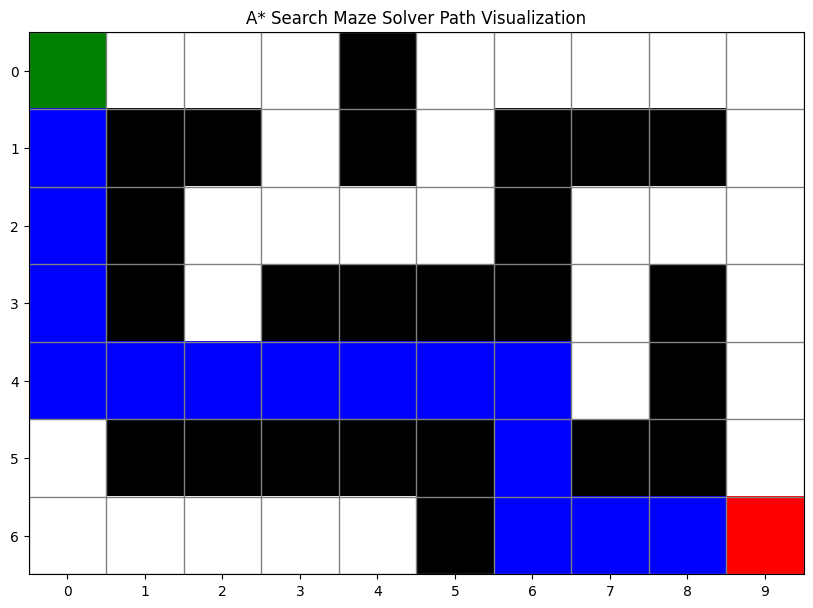


##################################################

--- Running A* on Maze 2 (Unreachable) ---
✅ Shortest Path Found (Length: 6). Displaying solution.


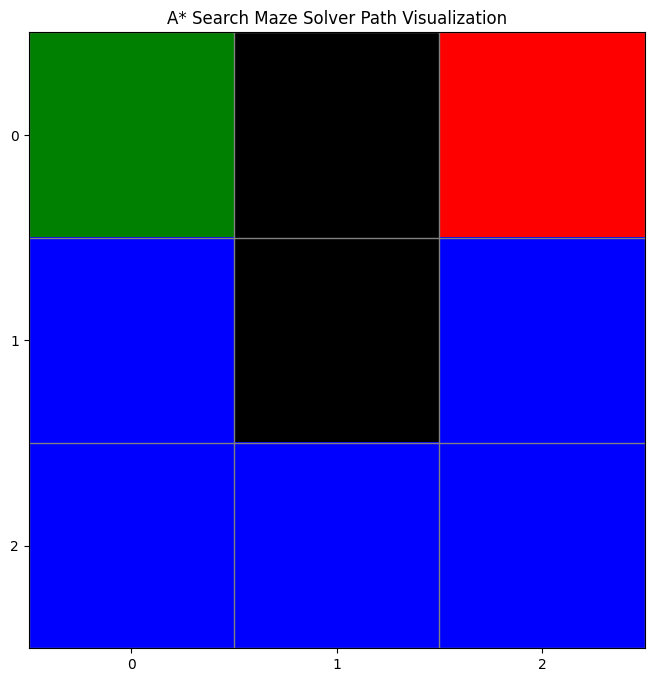

In [15]:
if __name__ == '__main__':
    start_pos_1 = (0, 0)
    end_pos_1 = (6, 9)
    print("--- Running A* on Maze 1 (Reachable) ---")
    shortest_path_1 = a_star_search(MAZE_1, start_pos_1, end_pos_1)
    visualize_maze_graphical(MAZE_1, shortest_path_1, start_pos_1, end_pos_1)
    print("\n" + "#"*50 + "\n")
    start_pos_2 = (0, 0)
    end_pos_2 = (0, 2)
    print("--- Running A* on Maze 2 (Unreachable) ---")
    shortest_path_2 = a_star_search(MAZE_2_UNREACHABLE, start_pos_2, end_pos_2)
    visualize_maze_graphical(MAZE_2_UNREACHABLE, shortest_path_2, start_pos_2, end_pos_2)